1.6.21.21

# 1. Introduction 

A brief description of your approach to the problem and the results that you have obtained on the training data.

<font color="red"><b>!!!!!!!! FILL THIS IN PLS<b>

# 2. Data Import

This section is how you import the data into the notebook. It should be written in such a way that I can modify it to run on my own machine by simply changing the location of the training data and any additional data sources that you have used.


### 2.1 Import the libraries

In [103]:
# The dependencies for anaconda can be downloaded from the main directory.
# There are some version control works have to be done for the incompatibility
# e.g. 'pandas_ml does not work with pandas >= 0.25.0, so we used the pandas = 0.24.2'
import numpy as np
import pandas as pd
import pandas_profiling
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
# from pandas_ml import ConfusionMatrix

from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)
%matplotlib inline

from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE, ADASYN

# import lightgbm as lgb
# import xgboost as xgb

from sklearn.model_selection import KFold

### 2.2 Load the datasets

In [3]:
df_train = pd.read_csv("DataFiles/CreditCard_train.csv",header = 1)
df_test = pd.read_csv("DataFiles/CreditCard_test.csv",header = 1)
all_data = pd.concat([df_train,df_test])

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 5999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                

### 2.3 Data dictionary
Below is a data dictionary from https://www.kaggle.com/yapsoonchung/eda-on-default-of-credit-card-clients-dataset/comments & https://www.researchgate.net/publication/326171439_Default_Payment_Analysis_of_Credit_Card_Clients

# 3. Data Transformation & EDA
any exploration of the data that you performed such as visualization, feature extraction, etc.

### 3.1 Data Transformation

In [13]:
# check for unique values in each columns
for c in all_data.columns[2:11]:
    unique_vals = all_data[c].unique()
    print(c,"-"*5,unique_vals)

SEX ----- [2 1]
EDUCATION ----- [2 1 3 5 4 6 0]
MARRIAGE ----- [1 2 3 0]
AGE ----- [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 ----- [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 ----- [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 ----- [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 ----- [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 ----- [-2  0 -1  2  3  5  4  7  8  6]


SEX: EDUCATION: MARRIAGE: PAY_0:
In EDUCATION column, 0, 5 and 6 both encodes for 'unknown'. In MARRIAGE column, 0 is an extra category. To clean this:
1. covert 0, 5, 6 to 4, which encodes for 'others'.

In [14]:
def transform(data):
    
    #rename the feature PAY_0 to keep the names consistent
    data = data.rename(columns={"PAY_0": "PAY_1"}) 
    
    #0:female,1:male
    sex = {2:0} 
    data["SEX"] = data["SEX"].replace(sex)
    
    #recatergorize unknown labels
    data["EDUCATION"].replace([0,5,6], 4, inplace = True)
    data["MARRIAGE"].replace([0], 3, inplace = True)
    
    #drop ID, as this information does not help predicting the default value
    data.drop('ID', axis = 1,inplace = True)
    
    return data

In [15]:
all_data = transform(all_data)

### 3.2 Data Exploration (EDA)

1. Use auto-generated report to get an overview of the data
2. Use boxplots to visualize outliners in numerial features
3. Use describe() to retrive the gereral statistics for each feature
4. Use countplot() to visualise the distribution of all the categorical features
5. Explore sum of pay status
6. Explore limit - bill
7. Explore Bill - Paid
8. Evaluate the skewness of the distribution

#### 3.2.1 Auto-generated report

In [16]:
# check data types, features, null values
pandas_profiling.ProfileReport(all_data)

Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


#### 3.2.2 use boxplots to evaluate the skewness of and visualize outliners

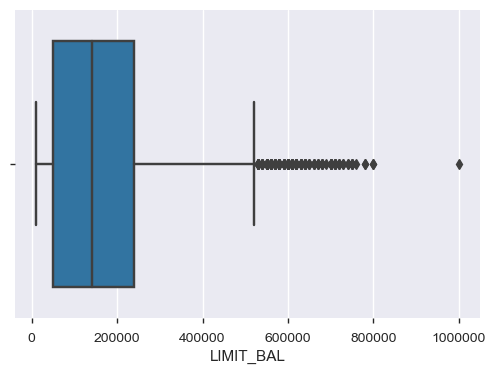

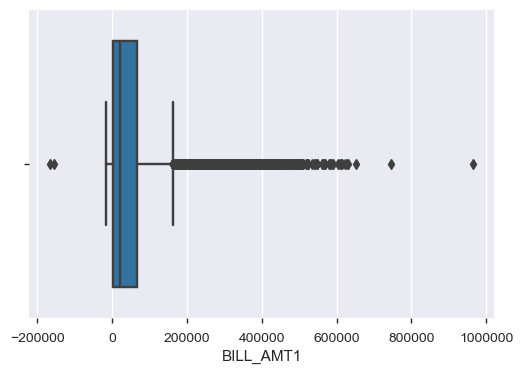

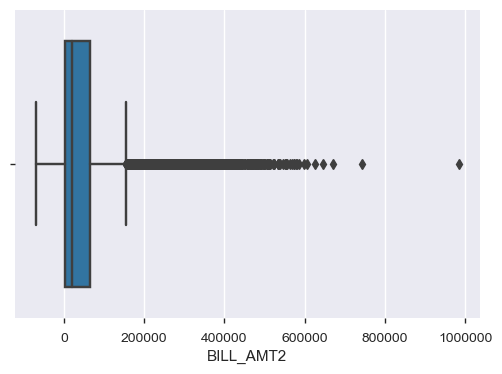

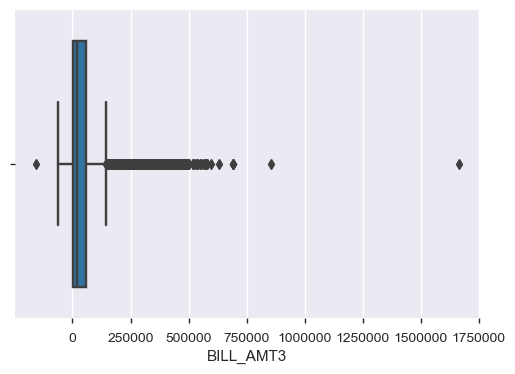

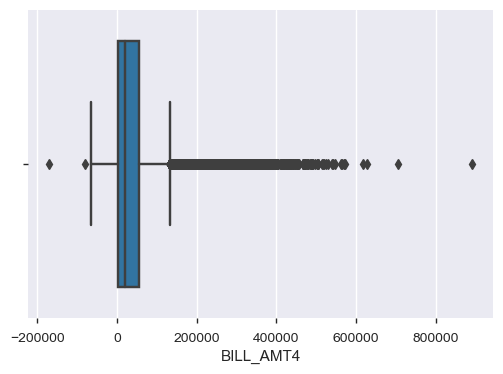

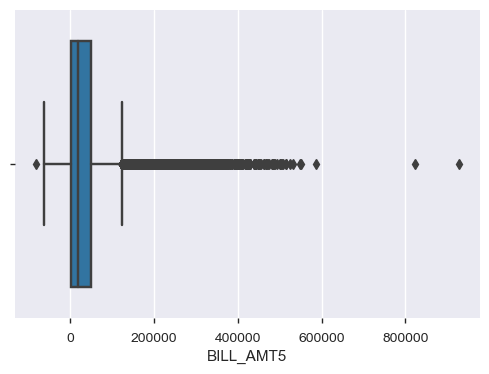

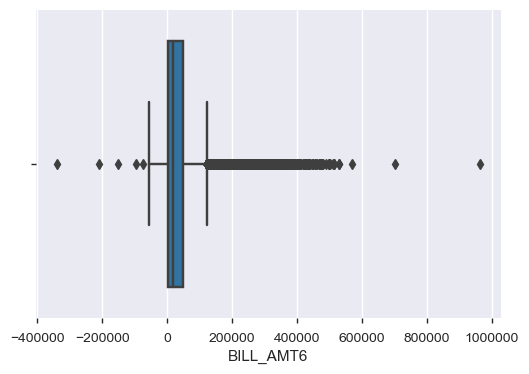

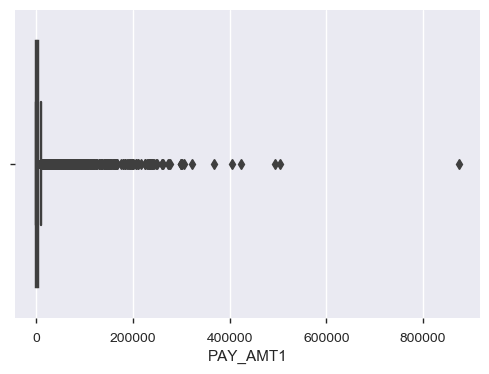

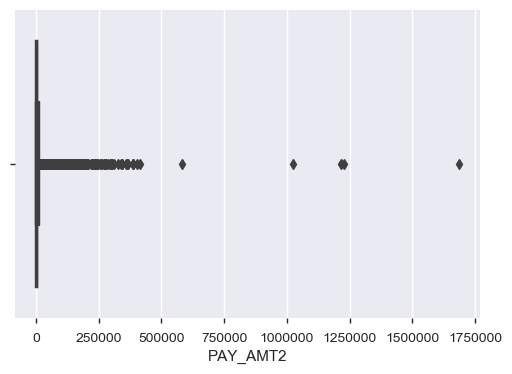

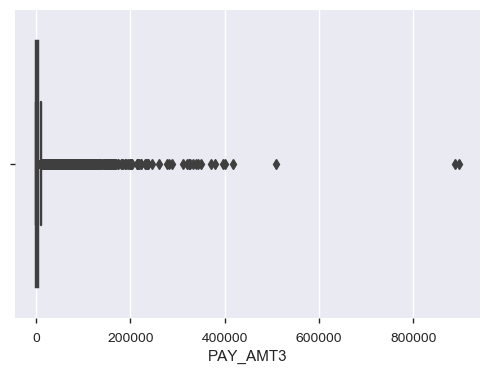

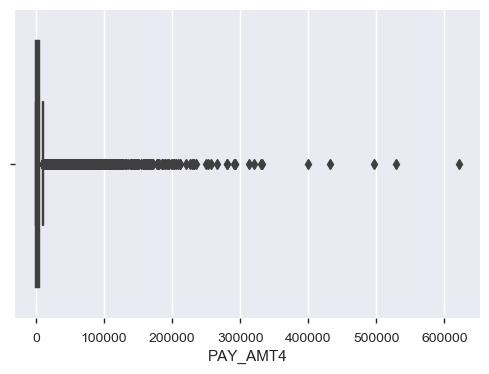

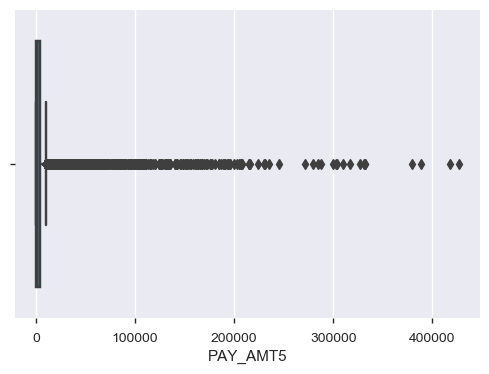

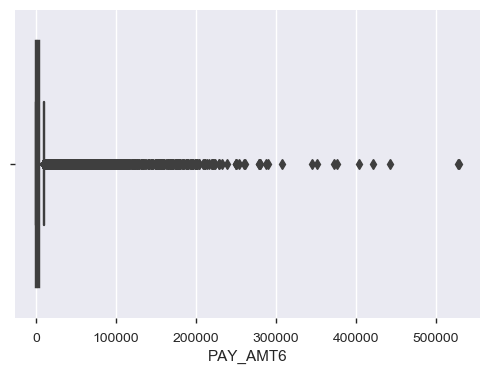

In [17]:
for c in ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.boxplot(x=all_data[c])
    plt.show()

#### 3.2.3 Use describe( ) to retrive the gereral statistics for each feature

In [18]:
all_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,1.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,1.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
#we divided the statistics into 4 catergories incase we need to use these statistics later in feature engineering
general_stats= all_data.describe().iloc[:,:5]
pay_status_stats = all_data.describe().iloc[:,5:11]
bill_stats = all_data.describe().iloc[:,11:17]
payed_stats = all_data.describe().iloc[:,17:23]

# save the Q1 and Q3 in separate dataframe
Q1 = pd.concat([general_stats.loc["25%"],bill_stats.loc["25%"],payed_stats.loc["25%"]])
Q3 = pd.concat([general_stats.loc["75%"],bill_stats.loc["75%"],payed_stats.loc["75%"]])

In [20]:
# all_data.iplot()

#### 3.2.4 use countplot( ) to visualise the distribution of all the categorical features and the distribution of "default of next month"

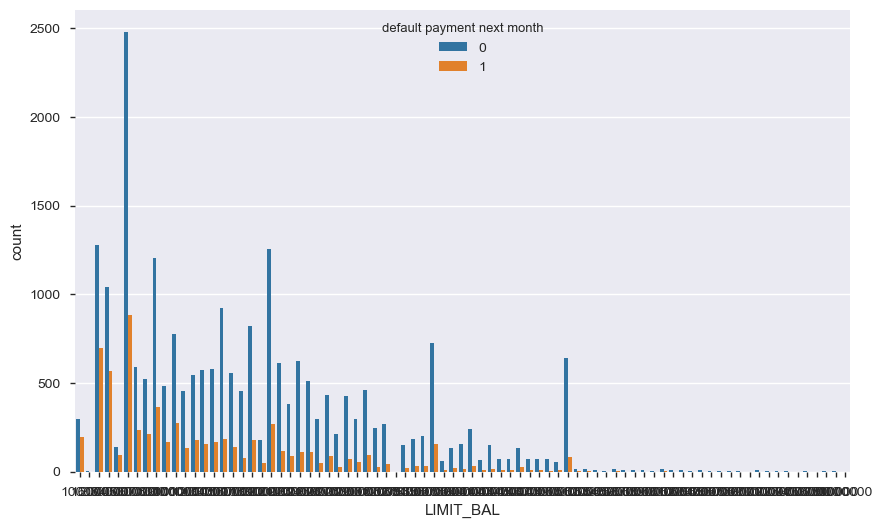

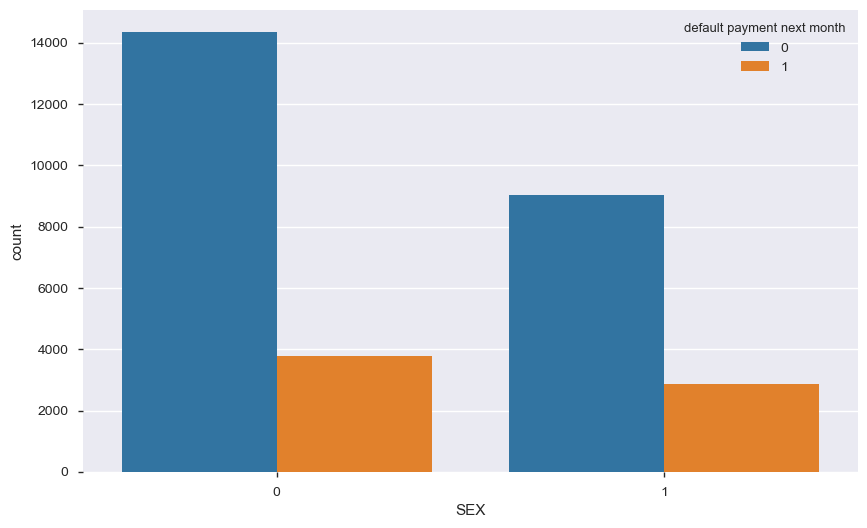

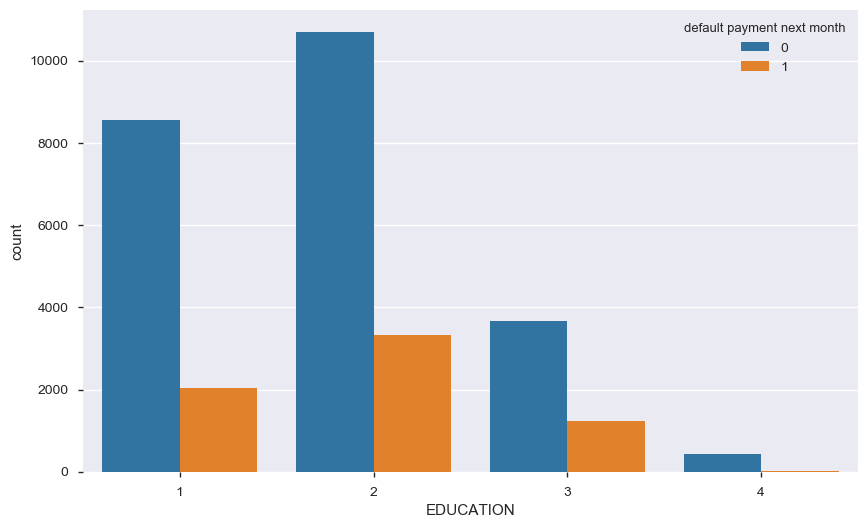

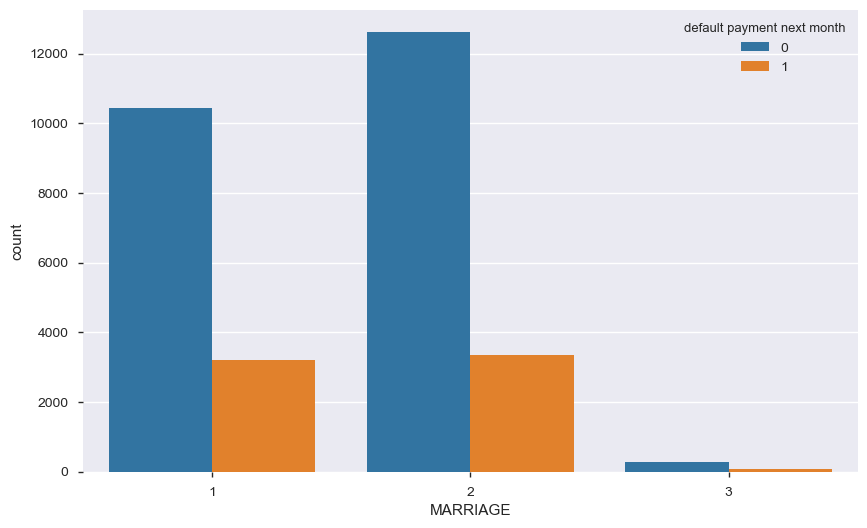

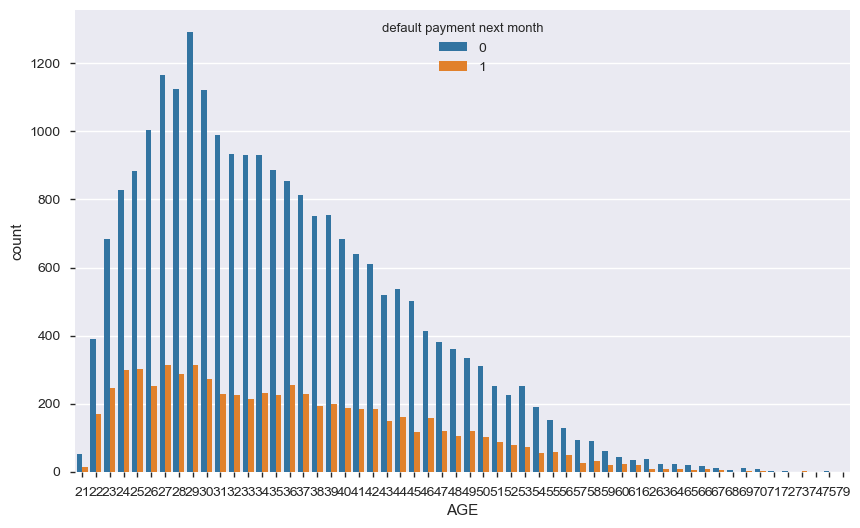

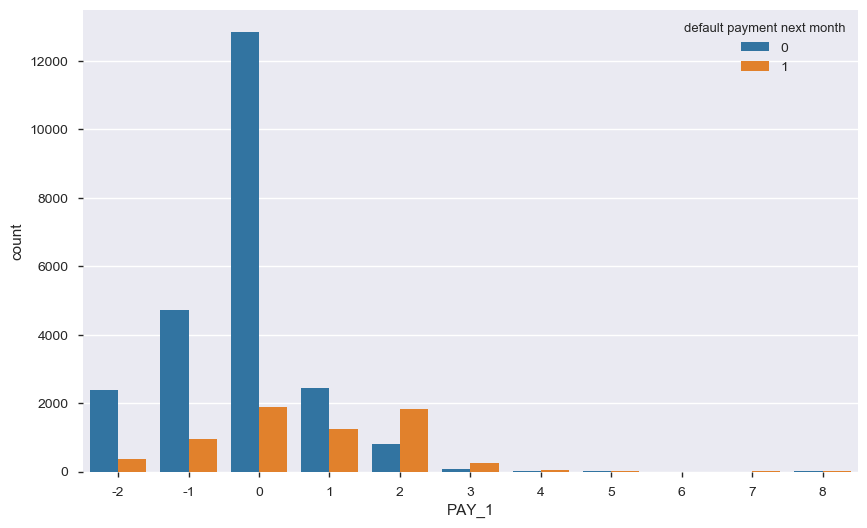

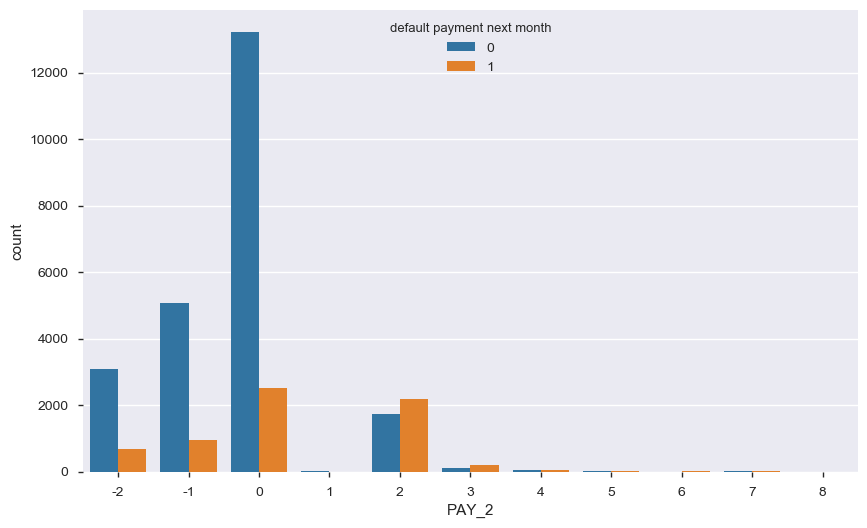

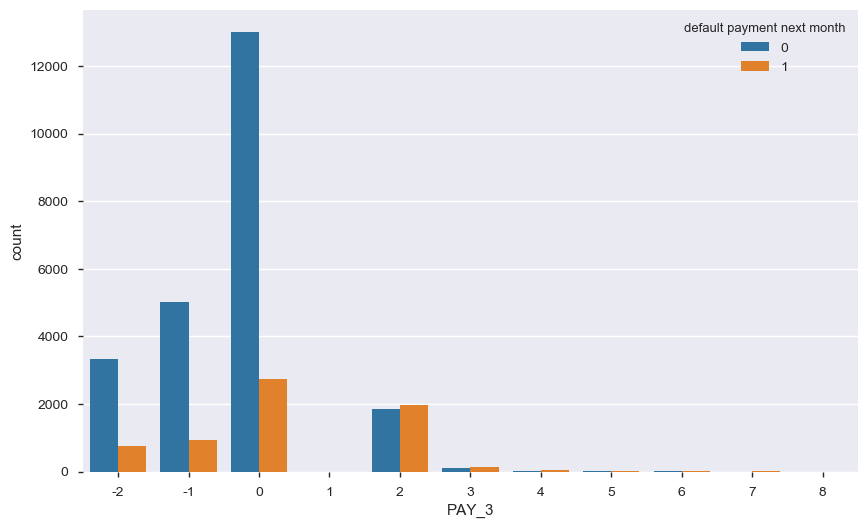

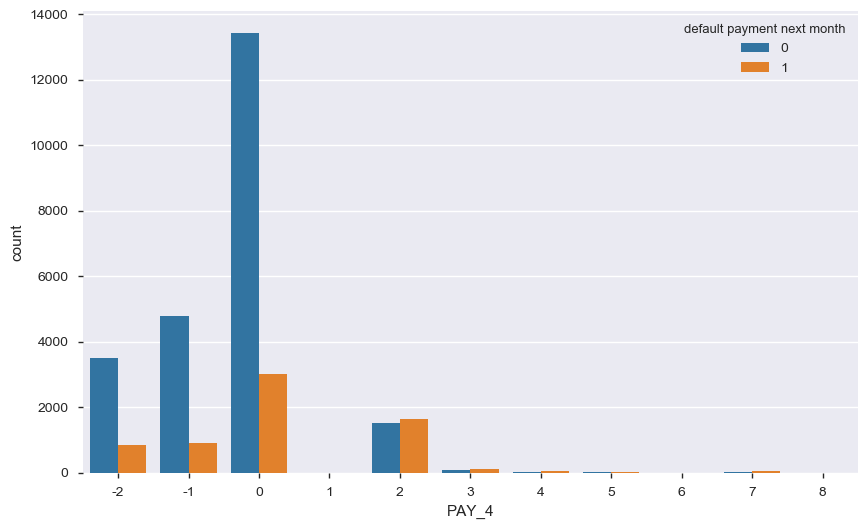

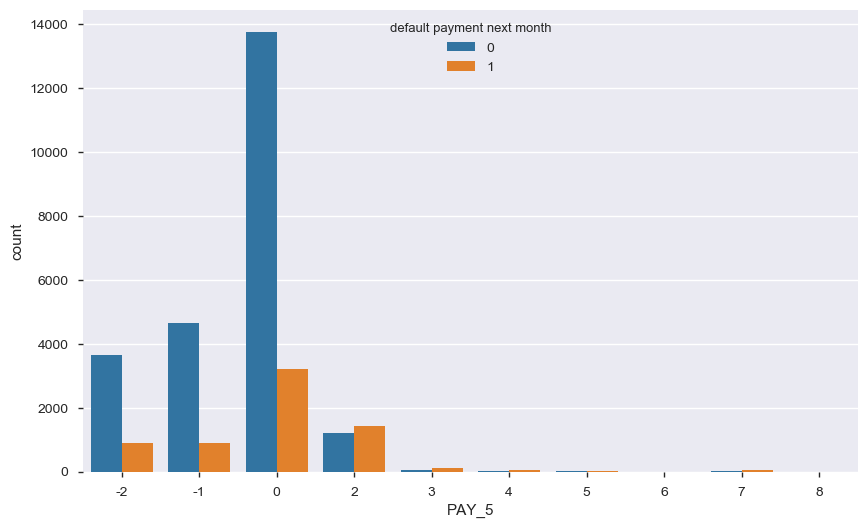

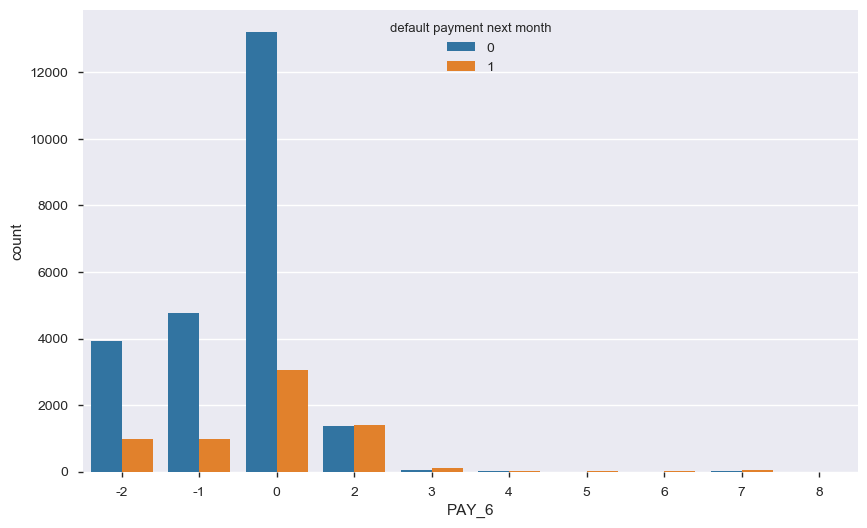

In [22]:
for c in all_data.columns[:11]:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x = c, hue="default payment next month", data = all_data)

#### 3.2.5 Explore sum of pay status

Because the the encoding for payment status ranged from -2 to infinitive, and the less is the better. We can add up all the payment status and use the sum to plot a graph. We can divide the data into two groups which are "ltz": less than zero and "mtz":more than zero, and investigate the percentage of getting default next month in each group.

In [23]:
pay_status_sum = all_data.iloc[:, 5:11].sum(axis=1)
bill_sum = all_data.iloc[:, 11:17].sum(axis=1)
pay_sum = all_data.iloc[:, 17:23].sum(axis=1)

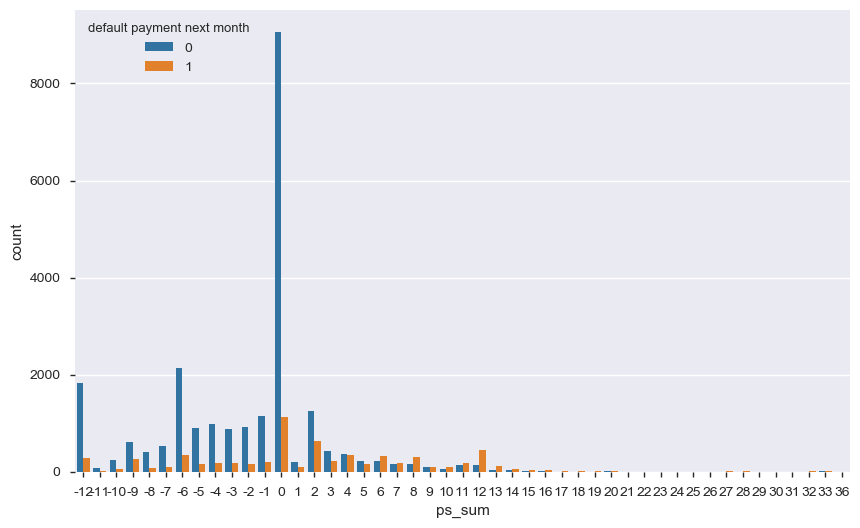

In [24]:
all_data["ps_sum"]  = pay_status_sum
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = "ps_sum", hue="default payment next month", data = all_data)

In [25]:
ltz = all_data[all_data["ps_sum"]<=0]
mtz = all_data[all_data["ps_sum"]>0]
ltz_1 = ltz["default payment next month"][ltz["default payment next month"]==1].count()/len(ltz)
mtz_1 = mtz["default payment next month"][mtz["default payment next month"]==1].count()/len(mtz)

print("Percentage of individuals getting default with a sum of pay status <=0: {:.3f}%".format(ltz_1*100))
print("Percentage of individuals getting default with a sum of pay status >0: {:.3f}%".format(mtz_1*100))

Percentage of individuals getting default with a sum of pay status <=0: 13.815%
Percentage of individuals getting default with a sum of pay status >0: 48.745%


#### 3.2.6 Explore limit-bill

In [26]:
all_data["limit-bill"] = all_data['LIMIT_BAL']*6 - bill_sum

In [27]:
spent_less_than_limit = all_data[all_data["limit-bill"]>=0]
spent_more_than_limit= all_data[all_data["limit-bill"]<0]
sll_1 = spent_less_than_limit["default payment next month"][spent_less_than_limit["default payment next month"]==1].count()/len(spent_less_than_limit)
sml_1 = spent_more_than_limit["default payment next month"][spent_more_than_limit["default payment next month"]==1].count()/len(spent_more_than_limit)

print("Percentage of individuals getting default who spent less than the limit: {:.3f}%".format(sll_1*100))
print("Percentage of individuals getting default who spent more than the limit: {:.3f}%".format(sml_1*100))

Percentage of individuals getting default who spent less than the limit: 21.857%
Percentage of individuals getting default who spent more than the limit: 34.223%


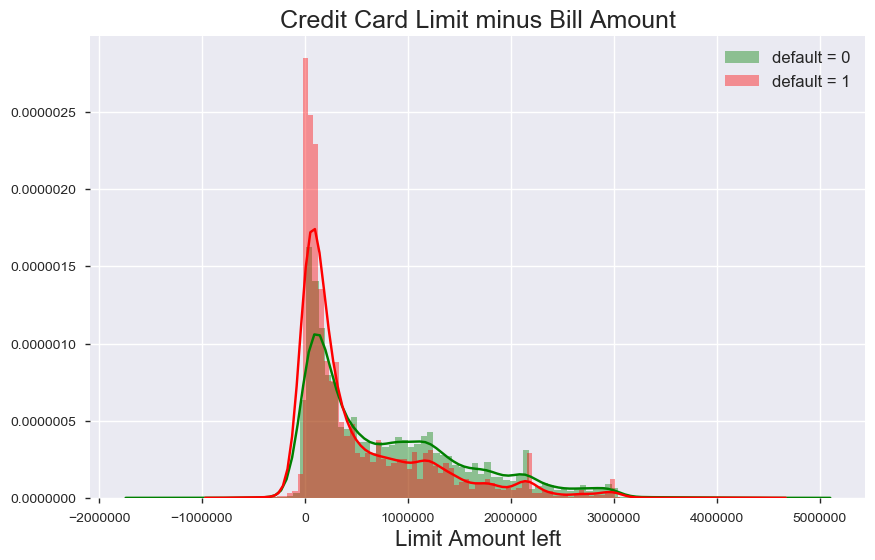

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(all_data["limit-bill"][all_data["default payment next month"]==0],color='green', bins=100,label = 'default = 0')
sns.distplot(all_data["limit-bill"][all_data["default payment next month"]==1],color='red', bins=100,label = 'default = 1')
plt.title('Credit Card Limit minus Bill Amount', fontsize=18)
plt.xlabel('Limit Amount left', fontsize=16)
plt.legend(prop={'size': 12})

#### 3.2.7 Explore Bill - Pay

In [29]:
# bill_sum.replace(0, 0.001, inplace = True) #so that the denominator won't be zero
all_data["bill-pay"] = bill_sum - pay_sum

In [30]:
paid_less_than_bill = all_data[all_data["bill-pay"]>0]
paid_more_than_bill = all_data[all_data["bill-pay"]<=0]
plb_1 = paid_less_than_bill["default payment next month"][paid_less_than_bill["default payment next month"]==1].count()/len(paid_less_than_bill)
pmb_1 = paid_more_than_bill["default payment next month"][paid_more_than_bill["default payment next month"]==1].count()/len(paid_more_than_bill)

print("Percentage of individuals getting default who paid less than the bill: {:.3f}%".format(plb_1*100))
print("Percentage of individuals getting default who paid more than the bill: {:.3f}%".format(pmb_1*100))

Percentage of individuals getting default who paid less than the bill: 22.472%
Percentage of individuals getting default who paid more than the bill: 20.178%


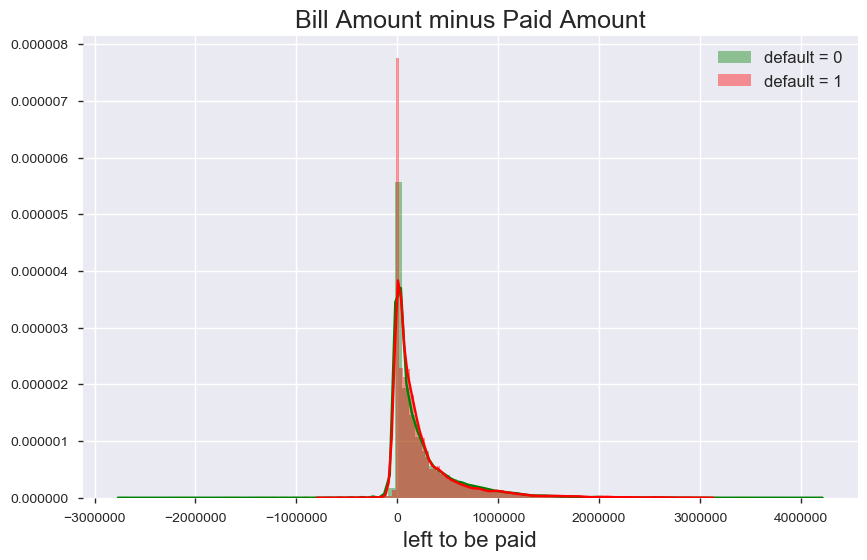

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(all_data["bill-pay"][all_data["default payment next month"]==0],color='green', bins=100,label = 'default = 0')
sns.distplot(all_data["bill-pay"][all_data["default payment next month"]==1],color='red', bins=100,label = 'default = 1')
plt.title('Bill Amount minus Paid Amount', fontsize=18)
plt.xlabel('left to be paid', fontsize=16)
plt.legend(prop={'size': 12})

In [32]:
# bills = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# for c in bills:
#     fig, ax = plt.subplots(figsize=(10,6))
#     plt.title(c + " Distribution", fontsize=12)
#     plt.xlabel('Amount in Dollars', fontsize=10)
#     plt.ylabel('Frequency', fontsize=10)
#     n, bins, patches = plt.hist(x=all_data[c], bins='auto', color='#0504aa', rwidth=0.85)

From the above diagram, we can see that the data is highly skewed, transformation is necessary  before trainning so that the data do not negatively affect the performance of a learning algorithm. Later I will be using a cubic root transformation significantly to reduce the range of values caused by outliers.

### 3.2.7 Summary of EDA

1. Use auto-generated report to get an overview of the data

    1. what problems did we find
        1. From the ProfileReport we can know that this dataset is not balanced. I.e only 20% of the dataset have a default of 1.
        2. The BIll_AMT 2-6 are highly correlated with BILL_AMT1
        3. The PAY_AMT2 is highly skewed
        4. Many features have a lot of zeros
        
    2. what we can do to resolve this 
        1. 
        
2. Use boxplots to evaluate skewness and visualize outliners 
3. Use describe() to retrive the gereral statistics for each feature
4. Use countplot() to visualise the distribution of all the categorical features
5. Explore sum of pay status
6. Explore limit - bill
7. Explore Bill - Paid

use this source and your own findings to fill this part in 
    https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5

# 4. Methodology Overview

1. background reading
2. Data Engineering
3. Training and Evaluating Model

#### 4.1 Background Reading

#### 4.2 Data Engineering

reference: http://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

In [33]:
quertiles = pd.DataFrame(Q1)
quertiles["Q3"] = Q3
quertiles.columns = ["Q1","Q3"]
quertiles["IQR"] = quertiles["Q3"] - quertiles["Q1"]
quertiles["newQ1"] = quertiles["Q1"] -1.5*quertiles["IQR"]
quertiles["newQ3"] = quertiles["Q3"] +1.5*quertiles["IQR"]
quertiles

,Q1,Q3,IQR,newQ1,newQ3
LIMIT_BAL,50000.00,240000.00,190000.00,-235000.000,525000.000
SEX,0.00,1.00,1.00,-1.500,2.500
EDUCATION,1.00,2.00,1.00,-0.500,3.500
MARRIAGE,1.00,2.00,1.00,-0.500,3.500
AGE,28.00,41.00,13.00,8.500,60.500
BILL_AMT1,3558.75,67091.00,63532.25,-91739.625,162389.375
BILL_AMT2,2984.75,64006.25,61021.50,-88547.500,155538.500
BILL_AMT3,2666.25,60164.75,57498.50,-83581.500,146412.500
BILL_AMT4,2326.75,54506.00,52179.25,-75942.125,132774.875
BILL_AMT5,1763.00,50190.50,48427.50,-70878.250,122831.750


In [34]:
# remove outliners in LIMIT_BAL
# all_data['LIMIT_BAL'][all_data['LIMIT_BAL']<Q1['LIMIT_BAL']] = np.nan
all_data['LIMIT_BAL'][all_data['LIMIT_BAL']>750000] = np.nan

# remove outliners in BILL AMTs
for c in ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    all_data[c][all_data[c] < quertiles.loc[c]["newQ1"]] = np.nan
    all_data[c][all_data[c]>(quertiles.loc[c]["newQ3"] +220000)] = np.nan

# remove outliners in PAY AMTs
for c in ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']:
#     all_data[c][all_data[c] < Q1[c]] = np.nan
    all_data[c][all_data[c]>(quertiles.loc[c]["newQ3"] +200000)] = np.nan

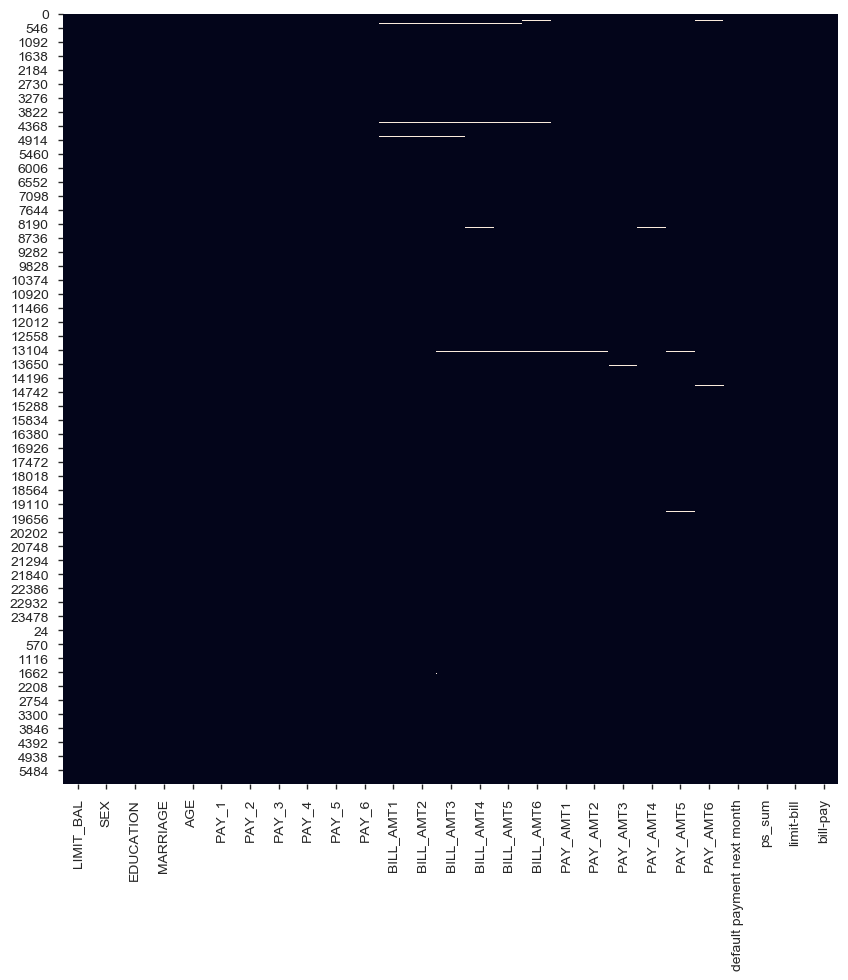

In [35]:
# Investigate patterns in the amount of missing data in each column.
plt.subplots(figsize=(10,10))
sns.heatmap(all_data.isnull(), cbar=False)

In [36]:
# only use the rows with no null values
all_zero_nan = all_data[all_data.isnull().sum(axis=1) == 0]

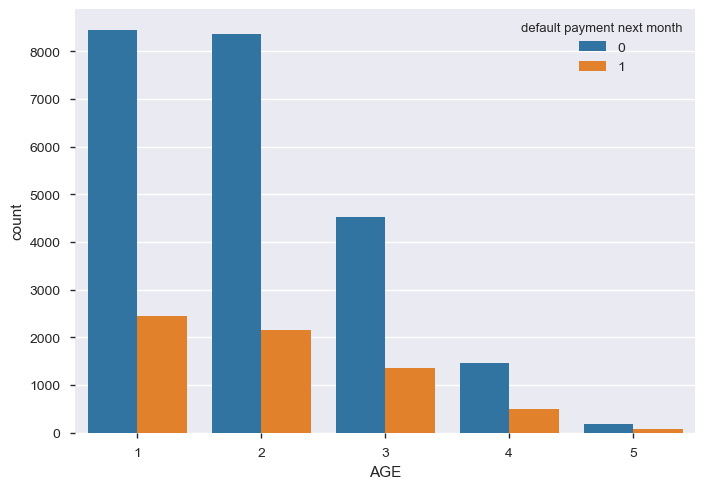

In [37]:
# Discretization: binning the AGE feature which ranges from 21 to 79
bins = [20,30,40,50,60,80]
labels = [1,2,3,4,5]
all_zero_nan['AGE'] = pd.cut(all_zero_nan['AGE'], bins, labels=labels)

sns.countplot(x = 'AGE', hue="default payment next month", data = all_zero_nan)

In [38]:
def engineer(data):
    
    train = data
    
    #Normalise the range
    bills = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    features_cubic_transformed = train
    features_cubic_transformed[bills] = train[bills].apply(lambda x: np.sign(x) * np.power(abs(x), 1./3))

    ##display normalised data
#     for c in bills:
#         fig, ax = plt.subplots(figsize=(10,6))
#         plt.title("Nomalised " + c)
#         n, bins, patches = plt.hist(x=features_cubic_transformed[c], bins='auto', color='#0504aa')
    
    # scale all numerical data
    numerical = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    scaler = MinMaxScaler()
    features_cubic_transformed[numerical] = scaler.fit_transform(features_cubic_transformed[numerical])
    

    final = pd.get_dummies(features_cubic_transformed, columns = ["EDUCATION","MARRIAGE","AGE"])
    
    return final

In [39]:
# clean the data
engineered_data = engineer(all_zero_nan)

In [40]:
pandas_profiling.ProfileReport(engineered_data)

Number of variables,37
Number of observations,29543
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,212.0 B
Numeric,22
Categorical,0
Boolean,14
Date,0
Text (Unique),0
Rejected,1


In [41]:
#save the label to anotehr dataframe
Y = engineered_data['default payment next month']
X = engineered_data
X.drop('default payment next month', axis = 1,inplace = True)

In [42]:
# Split the 'features' and 'income' data into training and testing sets
train_x, test_x, train_y, test_y= train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 41)

# Show the results of the split
print("Training set has {} samples.".format(train_x.shape[0]))
print("Testing set has {} samples.".format(test_x.shape[0]))

Training set has 23634 samples.
Testing set has 5909 samples.


In [43]:
# split the original train test data to create a base model
otrain_y = df_train['default payment next month']
otrain_x = df_train
otrain_x.drop('default payment next month', axis = 1,inplace = True)
otrain_x.drop('ID', axis = 1,inplace = True)
otest_y = df_test['default payment next month']
otest_x = df_test
otest_x.drop('default payment next month', axis = 1,inplace = True)
otest_x.drop('ID', axis = 1,inplace = True)

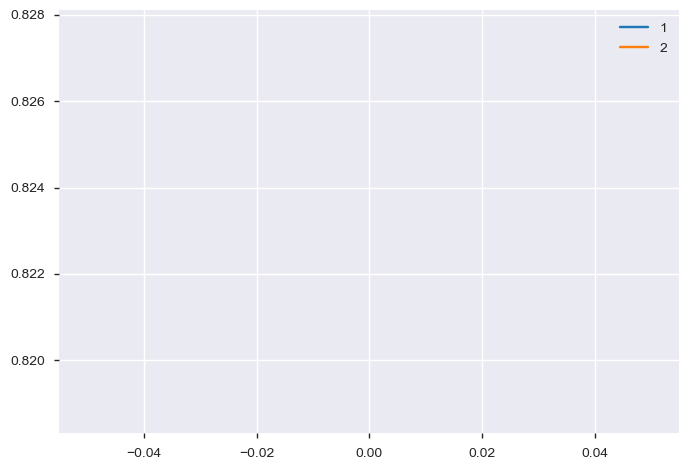

In [44]:
#test accuracy against the original data

first = []
second = []
for n in [1,10,100]:
    #clf1 uses engineered data
    clf1 = AdaBoostClassifier(random_state=41,n_estimators = n)
    clf1.fit(train_x,train_y)
    accuracy1 = clf1.score(test_x,test_y)
    first.append(accuracy1)
    
    #clf2 uses original data
    clf2 = AdaBoostClassifier(random_state=41,n_estimators = n)
    clf2.fit(otrain_x,otrain_y)
    accuracy2 = clf2.score(otest_x,otest_y)
    second.append(accuracy2)

plt.plot(first,label = 1)
plt.plot(second,label = 2)
plt.legend()

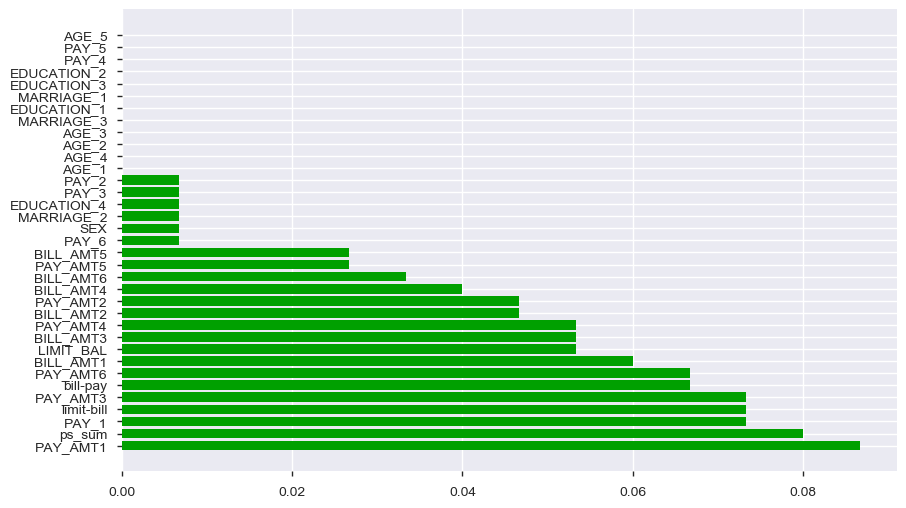

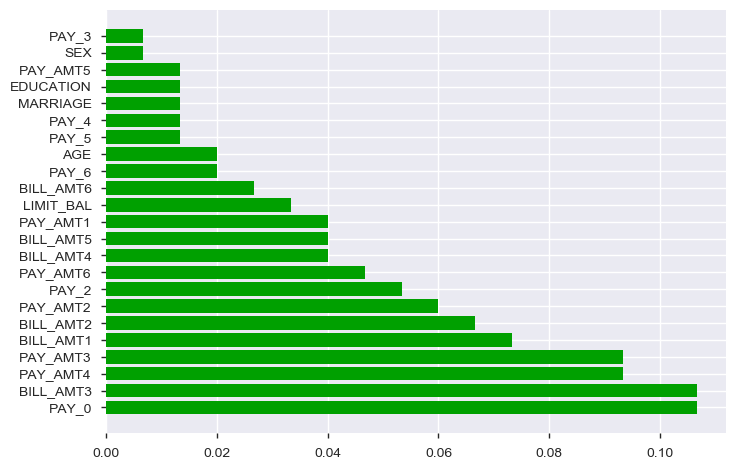

In [45]:
# Compare the importance
i1 = clf1.feature_importances_
i1_df= pd.DataFrame(i1.tolist(), index = train_x.columns)
i1_df.columns = ["clf1"]
i1_df = i1_df.sort_values(by = "clf1",ascending = False)

i2 = clf2.feature_importances_
i2_df= pd.DataFrame(i2.tolist(), index = otrain_x.columns)
i2_df.columns = ["clf2"]
i2_df = i2_df.sort_values(by = "clf2",ascending = False)

fig, ax = plt.subplots(figsize=(10,6))
plt.barh(i1_df.index, i1_df["clf1"],align="center", color = '#00A000',label = "Feature Weight")
plt.show()
plt.barh(i2_df.index, i2_df["clf2"],align="center", color = '#00A000',label = "Feature Weight")
plt.show()

# 5. Methodology Overview

Start by describing in broad terms your methodology. Include any background reading you may have done and a step by step description of how you have trained and evaluated your model. Describe any feature engineering that you have applied. If you had attempted different approaches prior to landing on your final methodology, then describe those approaches here.


In [61]:
df_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [4]:
# features = ['LIMIT_BAL']
# y = df['def_pay'].copy()
# X = df[features].copy()
# should have a single clean function and single feature function to use here, incresing readability and structure management
y = df_train['default payment next month']
x = df_train.drop('default payment next month', axis = 1,inplace = False)
x.drop('ID', axis = 1,inplace = True)

#split the data set into the train and testing sets
#random_state is the random number generator
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)
# X_train, X_test, y_train, y_test = train_x, test_x, train_y, test_y

## 4.8 Sampling

In [64]:
dfForSamping = X_train.join(y_train)
df_default = dfForSamping[dfForSamping['default payment next month'] == 1]
df_non_default = dfForSamping[dfForSamping['default payment next month'] == 0]

print("-"*50)
print('The number of people default')
print(df_default['default payment next month'].count())
print("-"*50)
print('The number of people non-default')
print(df_non_default['default payment next month'].count())
print("-"*50)

--------------------------------------------------
The number of people default
4288
--------------------------------------------------
The number of people non-default
14912
--------------------------------------------------


### 4.8.1 Resampling

In [65]:
# upscales the default samples to the same size as non default
df_default_upscaled = resample(df_default, replace=True, n_samples=14912, random_state=100)
# Combine the non-default and upscaled default
df_upscaled = pd.concat([df_non_default, df_default_upscaled])

df_upscaled['default payment next month'].value_counts()

1    14912
0    14912
Name: default payment next month, dtype: int64

In [66]:
# downscales the non-default samples to the same size as default
df_non_default_downscaled = resample(df_non_default, replace=True, n_samples=4288, random_state=100)
# Combine the default and downscaled non-default
df_downscaled = pd.concat([df_default, df_non_default_downscaled])

df_downscaled['default payment next month'].value_counts()

1    4288
0    4288
Name: default payment next month, dtype: int64

### 4.8.2 SMOTE

In [67]:
#SMOTE adopts the 'not. majority' as default sampling strategy, we just rewrite here to annouce that we are only doing
#upscaled but not downscaled so choosing 'not majority' to avoid unbias.
sm = SMOTE(sampling_strategy='not majority',random_state=100)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(X_SMOTE))
print(y_SMOTE.sum())

NameError: name 'SMOTE' is not defined

###  4.8.3 ADASYN

In [68]:
ada = ADASYN(random_state=100)
X_ADA, y_ADA = sm.fit_sample(X_train, y_train)
print(len(X_ADA))
print(y_ADA.sum())

NameError: name 'ADASYN' is not defined

# 5. Model Training & Validation

### 5.1 Using K-fold cross validation to tests the performance of different ensemble classifiers.
Here we are using the clean data sets after transformation and feature engineering has been applied, and then feeds into different classifiers to test the performance. We are using runtime, accuracy, fbeta(beta=3) for analysis on the performance.

In [5]:
# clf_list = [
#             #averaging
#             DecisionTreeClassifier(max_depth = 4, min_samples_split = 2,random_state = 100),
#             RandomForestClassifier(n_estimators = 60, random_state = 100),
#             BaggingClassifier(random_state = 100),
#             #boosting
#             AdaBoostClassifier(n_estimators = 60, random_state = 100),
#             GradientBoostingClassifier(),
#             #unknown
#             SGDClassifier(random_state = 100),
# #             SVC(random_state = 100, gamma = 'auto'),
#             KNeighborsClassifier()
# ]
clf_list = [RandomForestClassifier(n_estimators = 60, random_state = 100),
            AdaBoostClassifier(n_estimators = 60, random_state = 100),
            GradientBoostingClassifier(n_estimators = 60, random_state = 100),
]

In [6]:
# split the data sets into 6 folders to multple trains and tests
kf = KFold(n_splits=6,random_state=100,shuffle=True)

mdl = []
fold = []
accuracy = []
fbeta = []
timeLength = []

for i,(train_index, test_index) in enumerate(kf.split(df_train)):
    training = df_train.iloc[train_index,:]
    test = df_train.iloc[test_index,:]
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training.drop('default payment next month', axis = 1,inplace = False)
        label = training['default payment next month']
        valid_feats = test.drop('default payment next month', axis = 1,inplace = False)
        valid_label = test['default payment next month']
        start = time()
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        end = time()
        
        accuracyScore = accuracy_score(y_true = valid_label, y_pred = pred)
        fbetaScore= fbeta_score(y_true = valid_label, y_pred = pred, beta = 3)
        
        fold.append(i+1)
        accuracy.append(accuracyScore)
        fbeta.append(fbetaScore)
        timeLength.append(end-start)
        mdl.append(model)


performance = pd.DataFrame({'Model': mdl, 'Accuracy':accuracy, 'Fbeta': fbeta, 'Runtime': timeLength, 'Fold':fold})
#g_normal = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
#print(g_normal)

In [7]:
performance

,Model,Accuracy,Fbeta,Runtime,Fold
0,RandomForestClassifier,0.80950,0.367356,2.702530,1
1,AdaBoostClassifier,0.80850,0.343378,1.600409,1
2,GradientBoostingClassifier,0.81425,0.377863,3.476365,1
3,RandomForestClassifier,0.81825,0.384298,2.785658,2
4,AdaBoostClassifier,0.81775,0.339165,1.637630,2
5,GradientBoostingClassifier,0.82225,0.374097,3.695456,2
6,RandomForestClassifier,0.81375,0.375625,2.679883,3
7,AdaBoostClassifier,0.81275,0.334232,1.652380,3
8,GradientBoostingClassifier,0.81800,0.372055,3.593450,3
9,RandomForestClassifier,0.80550,0.376550,2.712930,4


In [92]:
#performance_a[performance_a['Model'] == 'AdaBoostClassifier']['Score'].mean()

0.8147500000000001

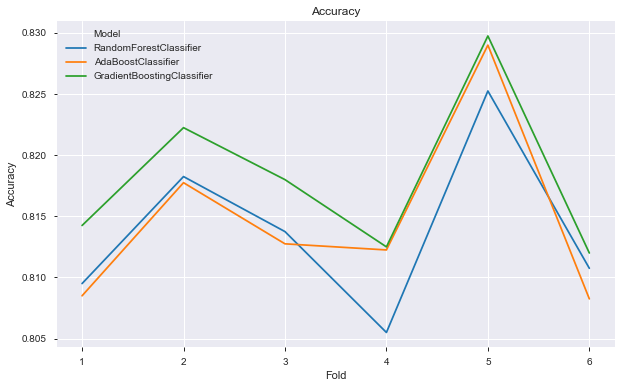

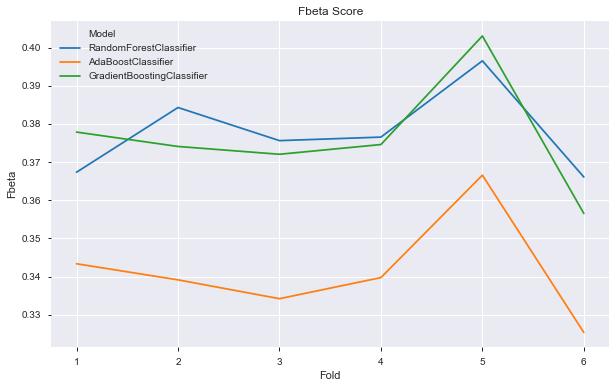

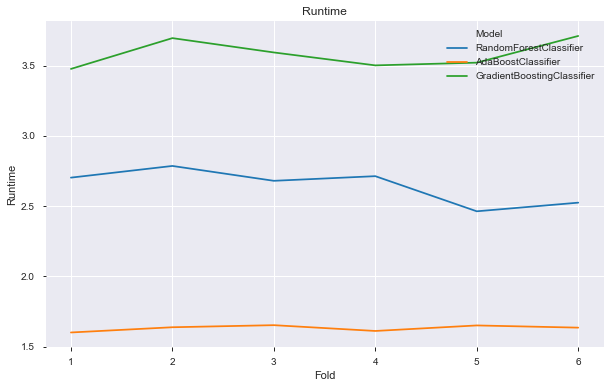

In [8]:
plt.subplots(figsize=(10,6))
sns.lineplot(x="Fold", y="Accuracy",hue = "Model" ,data=performance).set_title("Accuracy")
plt.show()
plt.subplots(figsize=(10,6))
sns.lineplot(x="Fold", y="Fbeta",hue = "Model" ,data=performance).set_title("Fbeta Score")
plt.show()
plt.subplots(figsize=(10,6))
sns.lineplot(x="Fold", y="Runtime",hue = "Model" ,data=performance).set_title("Runtime")
plt.show()

In [104]:
# def train_predict(learner,sample_size, X_train, y_train, X_test, y_test): 
#     results = {}
    
#     # Fit the learner
#     start = time() # Get start time
#     learner.fit(X_train[:sample_size], y_train[:sample_size])
#     end = time() # Get end time
#     # Calculate the training time
#     results['train_time'] = end-start

#     start = time() # Get start time
#     predictions_test = learner.predict(X_test)
#     predictions_train = learner.predict(X_train)
#     end = time() # Get end time
    
#     results['pred_time'] = end-start
#     results['acc_train'] = accuracy_score(y_train,predictions_train)
#     results['acc_test'] = accuracy_score(y_test,predictions_test)
#     results['f_train'] = fbeta_score(y_train,predictions_train,beta = 3)
#     results['f_test'] = fbeta_score(y_test,predictions_test, beta = 3)
       
#     # Success
#     print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
        
#     # Return the results
#     return results

In [105]:
# tt = []
# atr = []
# ftr = []
# pt = []
# at = []
# ft = []

# # Initialize the models
# clf_A = AdaBoostClassifier(random_state = 42)
# clf_B = SVC(random_state = 42, gamma = 'auto')
# clf_C = KNeighborsClassifier()
# clf_D = RandomForestClassifier(random_state = 42)
# clf_E = BaggingClassifier(random_state = 42)
# clf_F = DecisionTreeClassifier(random_state = 42)
# clf_G = GradientBoostingClassifier(random_state = 42)
# clf_H = LogisticRegression(random_state = 42)
# clf_I = SGDClassifier(random_state = 42)

# # Collect results on the learners
# results = {}
# for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I]:
#     clf_name = clf.__class__.__name__
#     results[clf_name] = {}
#     results[clf_name] = \
#     train_predict(clf,24000, train_x, train_y, test_x, test_y)
    
    
# for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
#     for k, learner in enumerate(results.keys()):
#         if j == 0:
#             tt.append(results[learner][metric])
#         if j == 1:
#             atr.append(results[learner][metric])
#         if j == 2:
#             ftr.append(results[learner][metric])
#         if j == 3:
#             pt.append(results[learner][metric])
#         if j == 4:
#             at.append(results[learner][metric])
#         if j == 5:
#             ft.append(results[learner][metric])   

In [106]:
# # comparison btw different models using 
# fig, ax = plt.subplots(2, 3, figsize = (18,10))
# colors = ['red','orange','yellow','green','blue','violet','purple','pink','hotpink']
# ax[0,0].bar(range(len(results)), tt, align='center',color = colors)
# ax[0,1].bar(range(len(results)), atr, align='center',color = colors)
# ax[0,2].bar(range(len(results)), ftr, align='center',color = colors)
# ax[1,0].bar(range(len(results)), pt, align='center',color = colors)
# ax[1,1].bar(range(len(results)), at, align='center',color = colors)
# ax[1,2].bar(range(len(results)), ft, align='center',color = colors)

#  # Add titles
# ax[0, 0].set_title("Model Training Time")
# ax[0, 1].set_title("Accuracy Score on Training Subset")
# ax[0, 2].set_title("F-score on Training Subset")
# ax[1, 0].set_title("Model Predicting Time")
# ax[1, 1].set_title("Accuracy Score on Testing Set")
# ax[1, 2].set_title("F-score on Testing Set")

# # Add unique y-labels
# ax[0, 0].set_ylabel("Time (in seconds)")
# ax[0, 1].set_ylabel("Accuracy Score")
# ax[0, 2].set_ylabel("F-score")
# ax[1, 0].set_ylabel("Time (in seconds)")
# ax[1, 1].set_ylabel("Accuracy Score")
# ax[1, 2].set_ylabel("F-score")

#  # Create patches for the legend
# patches = []
# for i, learner in enumerate(results.keys()):
#     patches.append(mpatches.Patch(color = colors[i], label = learner))
# plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.63), loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

# plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
# plt.show()

<font color="red"> # fill this in 
    

# 6. Model training/validation

This contains a breakdown of how your model was trained and evaluated.


# Todo list
+ cross validation, grid search
+ argue the model complexity
+ visualise training error and CV error to evaluate the model
+ 

In [183]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

    

classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 42, criterion = 'gini'),
    RandomForestClassifier(random_state = 42, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
#     AdaBoostClassifier(random_state = 42)
#     BaggingClassifier(random_state = 42)
#     GradientBoostingClassifier(random_state = 42)
#     LogisticRegression(random_state = 42)

]

classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]

classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
 

def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch best parameter：", search.best_params_)
    print("GridSearch best score： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("Accuracy %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([,
            ('pca',PCA()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch best score： 0.8177
Accuracy 0.8182


/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'decisiontreeclassifier__max_depth': 6}
GridSearch best score： 0.8055
Accuracy 0.8078


/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'randomforestclassifier__n_estimators': 6}
GridSearch best score： 0.7936
Accuracy 0.7962


/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'kneighborsclassifier__n_neighbors': 8}
GridSearch best score： 0.8038
Accuracy 0.8050


In [32]:
# import library
from sklearn.metrics import make_scorer
X_train = otrain_x
y_train = otrain_y
X_test = otest_x
y_test = otest_y

As we can see below, we are using all the features without selection and merge. We are doing the the raw machine learning and trying to use GridSearchCV to improve.

## 1.AdaBoostClassifier

In [296]:
# define the classifier.
clf = AdaBoostClassifier(n_estimators=10, random_state=0)
# training the classifier
clf.fit(train_x, train_y)
# do our predictions on the test
predictions = clf.predict(test_x)
# see how good we did on the test
accuracy_score(y_true = test_y, y_pred = predictions)

0.8168333333333333

In [297]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def show_metrics():
    tp = cm.stats()['TP']
    fn = cm.stats()['FN']
    fp = cm.stats()['FP']
    tn = cm.stats()['TN']
    print('Precision: {:.3f}'.format(tp/(tp+fp)))
    print('Recall: {:.3f}'.format(tp/(tp+fn)))
    print('F1 score: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

    
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False       4480   186     4666
True         913   421     1334
__all__     5393   607     6000
------------------------------
Precision: 0.694
Recall: 0.316
F1 score: 0.434


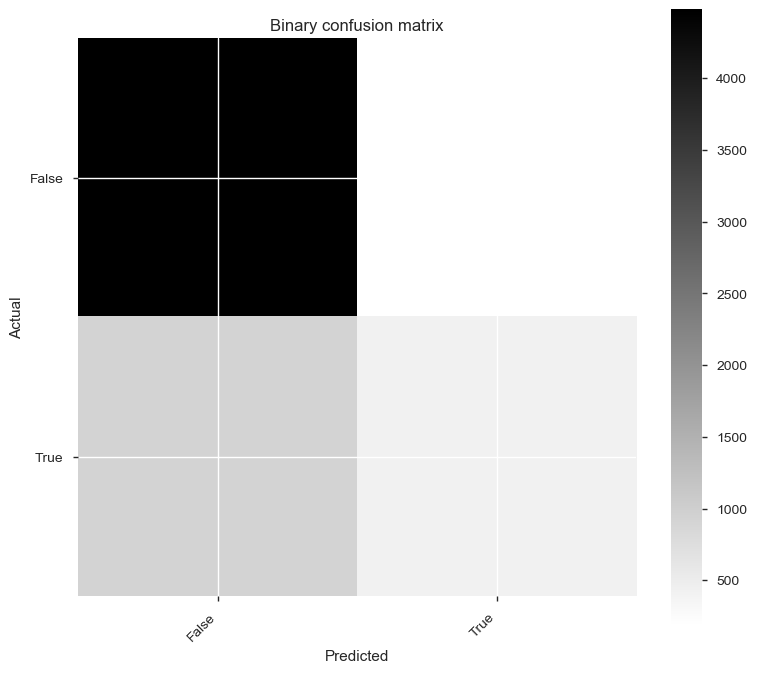

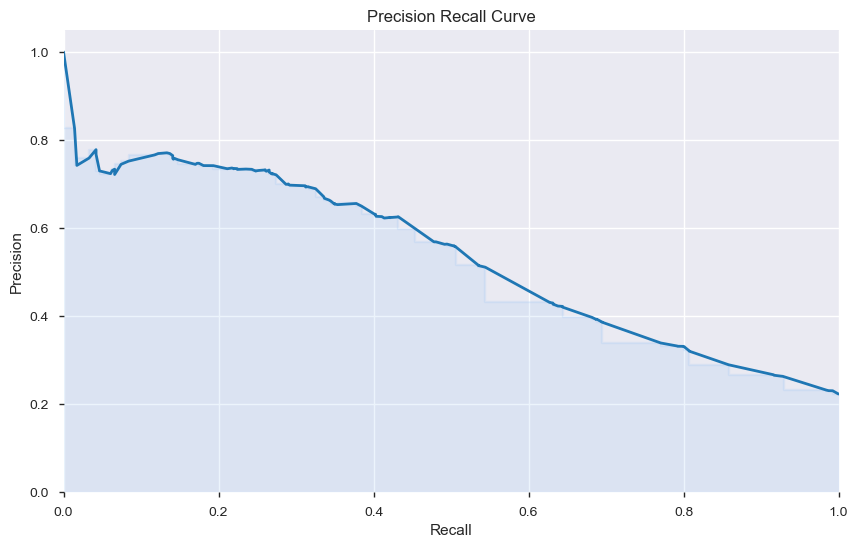

In [298]:
cm = ConfusionMatrix(test_y.tolist(), predictions.tolist())
print("Confusion matrix:\n%s" % cm)
cm.plot()
cm.stats()# to retrieve the dictionary 
print("-"*30)
show_metrics()
score_y = clf.decision_function(test_x)
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
fig, ax = plt.subplots(figsize=(10,6))
plot_precision_recall()

Test on the raw classifier, what we mean by raw is 'by some not too bad hyperparamers'. The only requirements for the hyperparamers here are 'not too complex tree' and 'reliable and acceprable answers'

In [34]:
# define the classifier.
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
# training the classifier
clf.fit(otrain_x, otrain_y)
# do our predictions on the test
predictions = clf.predict(otest_x)
# see how good we did on the test
accuracy_score(y_true = otest_y, y_pred = predictions)

0.8283333333333334

The score is not too bad as expected, let's how about feed in the best hyperparameters gained by cross-validation in grid(GridSearchCV).

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.6, 0.8, 1.0]}

# create the grid 
grid_search_tree = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 5, scoring= 'accuracy')

#training
grid_search_tree.fit(otrain_x, otrain_y)
#let's see the best estimator
print(grid_search_tree.best_estimator_)
#with its score
print(np.abs(grid_search_tree.best_score_))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=None)
0.8160833333333334


Let's see the classifier with predicted best hyperparamers gained by cross-validation through GridSearchCV

In [36]:
classifier = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=None)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8313333333333334

## 2.DecisionTreeClssifier

In [37]:
# define the clssifier and fit with the train data
classifier = DecisionTreeClassifier(max_depth=500, random_state=14)
classifier.fit(X_train, y_train)
# do our predictions on the test and see the scores
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7296666666666667

In [38]:
# define the parameters grid
param_grid = {'max_depth': np.arange(8, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
grid_tree.fit(X_train, y_train)

#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8168333333333333


In [39]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8306666666666667

## GradientBoostingClassifier

In [40]:
# define the clssifier and fit with the train data
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
# do our predictions on the test and see the scores
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8325

In [41]:
# define the parameters grid
# param_grid = {'max_depth':range(5,16,1),
#             'min_samples_split':range(200,1001,200),
#              'max_features':range(7,20,2)}

# create the grid
# grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# grid_tree.fit(X_train, y_train)

#let's see the best estimator
# print(grid_tree.best_estimator_)
#with its score
# print(np.abs(grid_tree.best_score_))

In [42]:
# classifier = GradientBoostingClassifier()
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# accuracy_score(y_true = y_test, y_pred = predictions)
# some tests

# 7. Results

Here you show the results that you obtain using your model on the training data. If you have multiple variations or approaches, this is where you compare them.


# 8. Final predictions

This is the section where you perform your final predictions on the test set using the model that you have trained in the previous section.


# 9. References

https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5